In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as ptl
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('who.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Podemos observar que la Columna bmi tiene algunos valores nulos

In [4]:
#Funcion para determinar la cantidad de bmi que son nulos
pd.isnull(df['bmi']).sum()

201

In [5]:
#Estoy llenando las columnas con valor null con el promedio de valores de la columna
df.bmi = df['bmi'].fillna(df['bmi'].mean())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# La variable Id es un identificador unico el cual no es relevante para la prediccion del lable stroke
# Al hacer un len comprobamos que todos los id son diferentes e iguales a la cantidad de instancias que hay.
len(df['id'].unique())

5110

In [8]:
#Utilizamos la funcion de drop que nos ofrece la libreria pandas y con el atributo axis=1 para eliminar una columna
df = df.drop('id', axis=1)

In [9]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [10]:
# Analisasmos la cantidad de personas que tuvieron un stroke y las que no, en el dataset

df.stroke.value_counts()



0    4861
1     249
Name: stroke, dtype: int64

## Como podemos observar los datos no estan balanceados ya que existe una mayor cantidad de personas que no han sufrido un Stroke con respecto a las que si han tennido un stroke la diferencia es de 4612 instancias

### Cleaning Not Null Values

In [11]:
# Variable genero puede tener alguna informacion basura.
df['gender'].unique()   

array(['Male', 'Female', 'Other'], dtype=object)

# Cambiar lo datos de ever_married por valores numericos

In [12]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df.ever_married = df.ever_married.apply(lambda x : 1 if x == 'Yes' else 0)

In [14]:
df.ever_married.value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

## Cambiar los datos de Residence_type por valores numericos

In [15]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [16]:
#Cambiamos los valores para cuando tengamos un tipo de residencia Urbana sea igual a 1 y cuando sea Rural sera 0
df.Residence_type = df.Residence_type.apply(lambda x : 1 if x == 'Urban' else 0)

In [17]:
df.Residence_type.value_counts()

1    2596
0    2514
Name: Residence_type, dtype: int64

In [18]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,1,Private,0,166.29,25.600000,formerly smoked,0


## Cambiar el genero a valores numericos 

In [28]:
df.gender = df.gender.apply(lambda x : 1 if x == 'Male' else 0)

In [19]:
df.describe()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,0.656164,0.508023,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,0.475034,0.499985,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,1.000000,1.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000


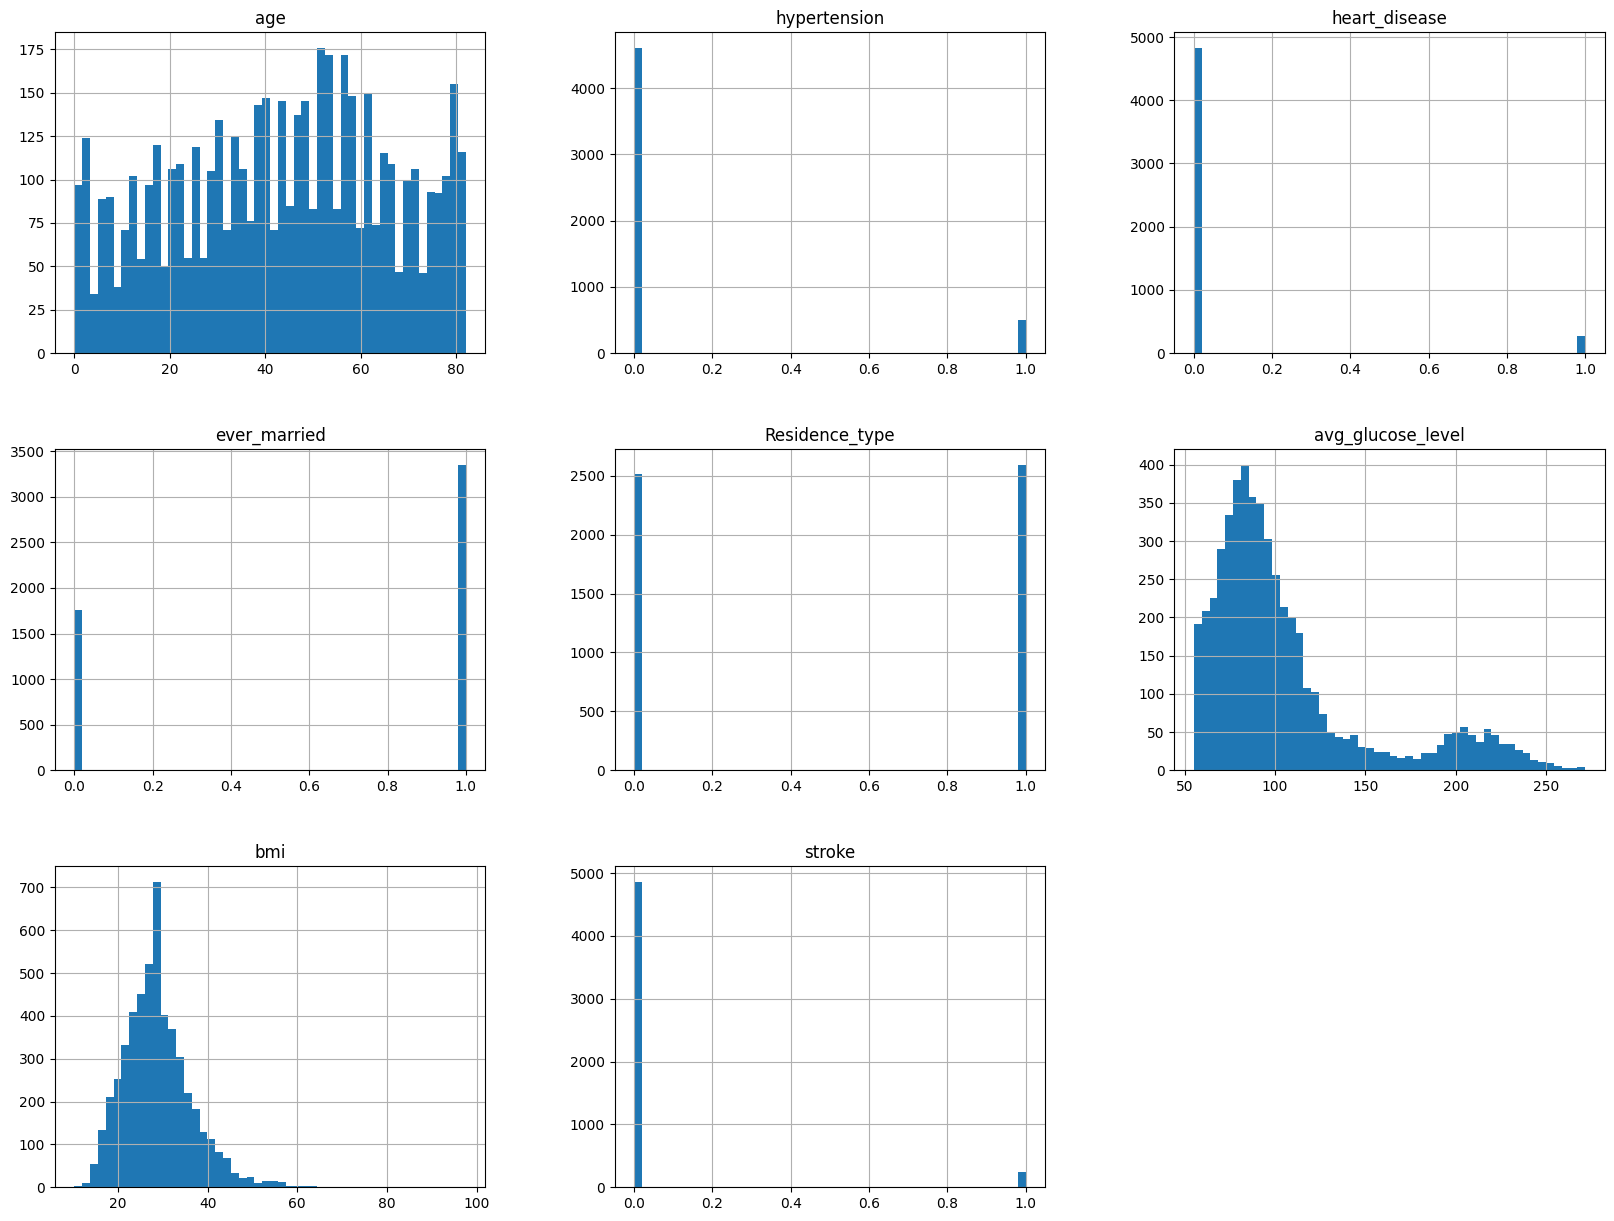

In [20]:
df.hist(bins=50, figsize=(20,15))
ptl.show()

## Creando Test set

In [27]:
train_set,test_set = train_test_split(df, test_size=0.2, random_state=42)

In [28]:
test_set.value_counts()

gender  age    hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
Female  0.08   0             0              No            children       Urban           139.67             14.1  Unknown          0         1
Male    19.00  0             0              No            Private        Rural           119.04             35.9  Unknown          0         1
        15.00  0             0              No            Private        Rural           144.15             24.1  never smoked     0         1
                                                          Self-employed  Urban           68.40              23.0  never smoked     0         1
                                                          children       Rural           205.50             24.2  never smoked     0         1
                                                                                                                                            ..
Fema

## Training set Copy

In [29]:
training_data = train_set.copy()

<AxesSubplot: xlabel='stroke', ylabel='avg_glucose_level'>

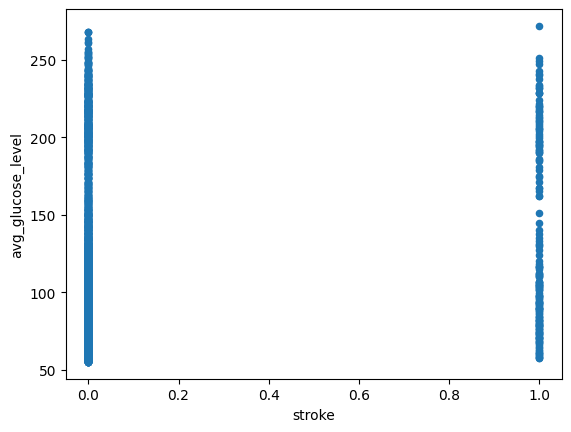

In [31]:
training_data.plot(kind="scatter",x = "stroke", y = "avg_glucose_level")

<AxesSubplot: ylabel='Frequency'>

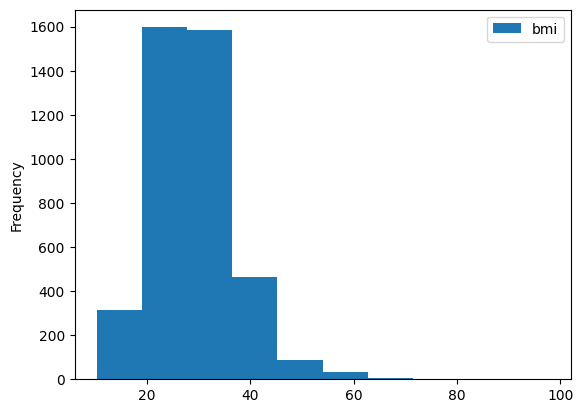

In [32]:
training_data.plot(kind="hist",x = "stroke", y = "bmi")

In [33]:
# Buscando correlaciones entre los atributos
corr_matrix = training_data.corr()

/tmp/ipykernel_1638607/4205492362.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = training_data.corr()


In [34]:
corr_matrix["stroke"]

age                  0.237170
hypertension         0.118129
heart_disease        0.131467
avg_glucose_level    0.122887
bmi                  0.038824
stroke               1.000000
Name: stroke, dtype: float64

array([[<AxesSubplot: xlabel='hypertension', ylabel='hypertension'>,
        <AxesSubplot: xlabel='heart_disease', ylabel='hypertension'>,
        <AxesSubplot: xlabel='avg_glucose_level', ylabel='hypertension'>,
        <AxesSubplot: xlabel='bmi', ylabel='hypertension'>,
        <AxesSubplot: xlabel='stroke', ylabel='hypertension'>,
        <AxesSubplot: xlabel='age', ylabel='hypertension'>],
       [<AxesSubplot: xlabel='hypertension', ylabel='heart_disease'>,
        <AxesSubplot: xlabel='heart_disease', ylabel='heart_disease'>,
        <AxesSubplot: xlabel='avg_glucose_level', ylabel='heart_disease'>,
        <AxesSubplot: xlabel='bmi', ylabel='heart_disease'>,
        <AxesSubplot: xlabel='stroke', ylabel='heart_disease'>,
        <AxesSubplot: xlabel='age', ylabel='heart_disease'>],
       [<AxesSubplot: xlabel='hypertension', ylabel='avg_glucose_level'>,
        <AxesSubplot: xlabel='heart_disease', ylabel='avg_glucose_level'>,
        <AxesSubplot: xlabel='avg_glucose_level', y

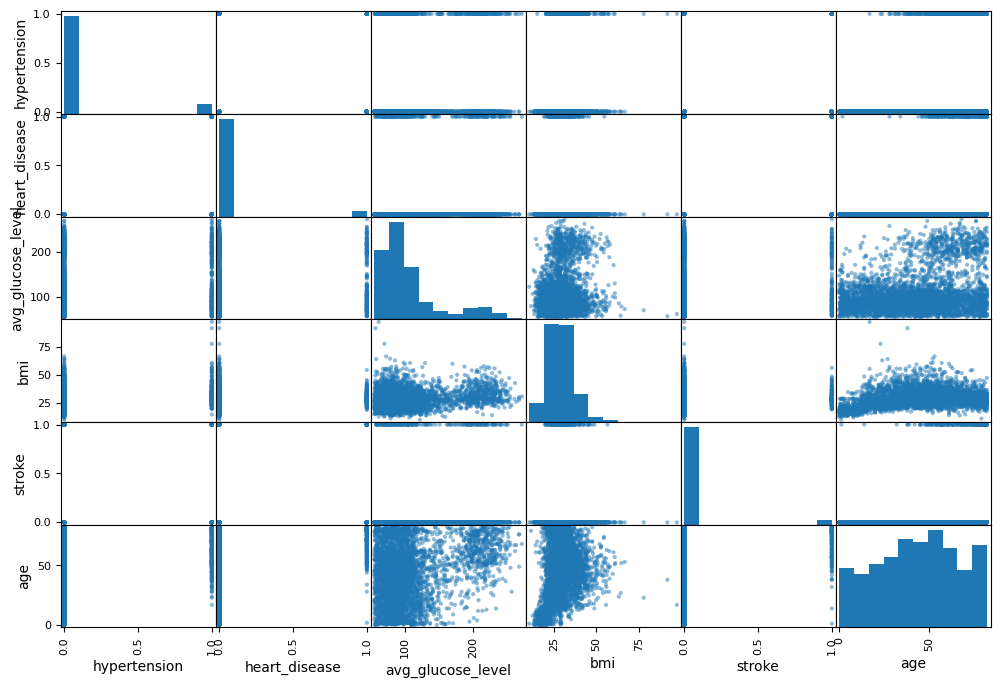

In [35]:
attributes = ["hypertension","heart_disease","avg_glucose_level","bmi","stroke","age"]

scatter_matrix(training_data[attributes], figsize=(12, 8))

<AxesSubplot: xlabel='avg_glucose_level', ylabel='bmi'>

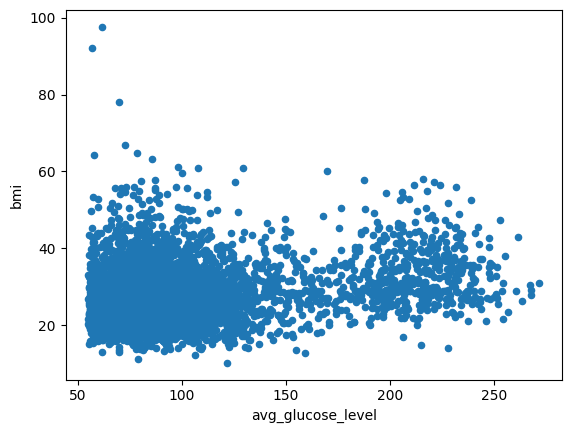

In [37]:
training_data.plot(kind="scatter", x="avg_glucose_level", y="bmi")

## Utilizo el algorimo Random forest para determinar cuales son los features de mayor importancia para el lable que querermos determinar

In [31]:
X = df.drop(['stroke'], axis = 1)
y = df['stroke']

In [32]:
X.shape, y.shape 

((5110, 10), (5110,))

In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X, y)

ValueError: could not convert string to float: 'Private'

In [24]:
# El shape en el axis 1 corresponde a las columnas del dataframe
X.shape[1]

5110

In [25]:
feature_names = [f'Feature {i}' for i in range(X.shape[1])]
print(feature_names)

['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9']
